install C++ complier

In [ ]:
!apt update && apt install -y clang

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.9 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,631 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubun

build googletest

In [ ]:
!apt-get install -y libgtest-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  googletest
The following NEW packages will be installed:
  googletest libgtest-dev
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 792 kB of archives.
After this operation, 5,156 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 googletest all 1.11.0-3 [541 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgtest-dev amd64 1.11.0-3 [250 kB]
Fetched 792 kB in 1s (1,168 kB/s)
Selecting previously unselected package googletest.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../googletest_1.11.0-3_all.deb ...
Unpacking googletest (1.11.0-3) ...
Selecting previously unselected package libgtest-dev:amd64.
Preparing to unpack .../libgtest-dev_1.11.0-3_amd64.deb ...
Unpacking libgtest-dev:amd64 (1.11.0-3

In [ ]:
!cd /usr/src/gtest && cmake CMakeLists.txt && make

CMake Warning (dev) at CMakeLists.txt:56 (project):
  cmake_minimum_required() should be called prior to this top-level project()
  call.  Please see the cmake-commands(7) manual for usage documentation of
  both commands.
This warning is for project developers.  Use -Wno-dev to suppress it.

-- The CXX compiler identification is GNU 11.4.0
-- The C compiler identification is GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
CMake Deprecation Warning at CMakeLists.txt:58 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value. 

In [ ]:
!cp /usr/src/gtest/lib/*.a /usr/lib

test cpp file

In [ ]:
%%writefile test.cpp
#include <iostream>
using namespace std;
int main() {
    cout << "Hello, Colab!" << endl;
    return 0;
}

Writing test.cpp


In [ ]:
!g++ test.cpp -o test
!./test

Hello, Colab!


install armadillo library

In [ ]:
!apt install -y libarmadillo-dev libblas-dev liblapack-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libarmadillo-dev is already the newest version (1:10.8.2+dfsg-1).
libarmadillo-dev set to manually installed.
Suggested packages:
  liblapack-doc
The following NEW packages will be installed:
  libblas-dev
0 upgraded, 1 newly installed, 0 to remove and 52 not upgraded.
Need to get 164 kB of archives.
After this operation, 1,084 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libblas-dev amd64 3.10.0-2ubuntu1 [164 kB]
Fetched 164 kB in 1s (239 kB/s)
Selecting previously unselected package libblas-dev:amd64.
(Reading database ... 124788 files and directories currently installed.)
Preparing to unpack .../libblas-dev_3.10.0-2ubuntu1_amd64.deb ...
Unpacking libblas-dev:amd64 (3.10.0-2ubuntu1) ...
Setting up libblas-dev:amd64 (3.10.0-2ubuntu1) ...


In [ ]:
!apt-get install -y liblapack-dev libopenblas-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libopenblas-dev is already the newest version (0.3.20+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
!ldconfig -p | grep openblas #check if openblas is installed

	libopenblas.so.0 (libc6,x86-64) => /lib/x86_64-linux-gnu/libopenblas.so.0
	libopenblas.so (libc6,x86-64) => /lib/x86_64-linux-gnu/libopenblas.so


test googletest

In [ ]:
%%writefile add.h
#ifndef ADD_H
#define ADD_H

int add(int a, int b);

#endif // ADD_H

Writing add.h


In [ ]:
%%writefile add.cpp
#include "add.h"

int add(int a, int b) {
    return a + b;
}

Writing add.cpp


In [ ]:
%%writefile test_add.cpp
#include <gtest/gtest.h>
#include "add.h"

TEST(AddTest, HandlesPositiveNumbers) {
    EXPECT_EQ(add(2, 3), 5);
    EXPECT_EQ(add(10, 20), 30);
}

TEST(AddTest, HandlesNegativeNumbers) {
    EXPECT_EQ(add(-1, -1), -2);
    EXPECT_EQ(add(-5, 5), 0);
}

int main(int argc, char **argv) {
    ::testing::InitGoogleTest(&argc, argv);
    return RUN_ALL_TESTS();
}

Overwriting test_add.cpp


In [ ]:
!g++ -std=c++11 test_add.cpp add.cpp -lgtest -lgtest_main -pthread -o gtest

In [ ]:
! ./gtest

[==========] Running 2 tests from 1 test suite.
[----------] Global test environment set-up.
[----------] 2 tests from AddTest
[ RUN      ] AddTest.HandlesPositiveNumbers
[       OK ] AddTest.HandlesPositiveNumbers (0 ms)
[ RUN      ] AddTest.HandlesNegativeNumbers
[       OK ] AddTest.HandlesNegativeNumbers (0 ms)
[----------] 2 tests from AddTest (0 ms total)

[----------] Global test environment tear-down
[==========] 2 tests from 1 test suite ran. (0 ms total)
[  PASSED  ] 2 tests.


---
##Assignment:
Implement the transformation of a Hermitian matrix to real
tridiagonal form and the QR-iteration with shifts and deflation for tridiagonal matrices.


#1. generate a Hermitian matrix
Hermitian matrix has real diagonal elements and a symmetric structure with complex conjugate. And it satisfies

\begin{equation}
    A = A^{H}
\end{equation}









In [ ]:
%%writefile test1.cpp
#include <iostream>
#include <armadillo>

using namespace std;
using namespace arma;

//step1: generate a random hermitian matrix;
cx_mat generateRandomHermitian (int n) {
  //create a random complex matrix B with a uniform distribution in [-3,3]
  cx_mat B = (randu<cx_mat>(n,n)*6 - 3) + (randu<cx_mat>(n,n)*6 - 3) * cx_double (0 ,1.0);
  //to ensure a symmetric structure
  cx_mat A = ( B+ B.t())/2 ; //why not B.st()? .st() is transpose here. .t() is transpose conjugate
  //to ensure real diagonal
  /*
  for (int t= 0; t< n; t++){
    A(t,t) = real(A(t, t));
  }
  */

  A.diag() = cx_vec(real(A.diag()), arma::zeros<vec>(n));
  A.print("Original Hermitian Matrix:");
  return A;
}

/*
int main(){
  int n =5;
  cx_mat H = generateRandomHermitian(n);
 //H.st().print("st:");
}
*/


Writing test1.cpp


In [ ]:
!g++  -O3 test1.cpp -o test1 -larmadillo -llapack -lblas -Winvalid-pch

/usr/bin/ld: /usr/lib/gcc/x86_64-linux-gnu/11/../../../x86_64-linux-gnu/Scrt1.o: in function `_start':
(.text+0x1b): undefined reference to `main'
collect2: error: ld returned 1 exit status


In [ ]:
!time ./test1

Original Hermitian Matrix:
    (-1.617e+00,+0.000e+00)    (-6.401e+00,-1.803e+00)    (-3.263e-01,-9.721e-01)    (-6.119e-01,+6.669e-01)    (-3.705e+00,+2.585e-01)
    (-6.401e+00,+1.803e+00)    (-3.720e+00,+0.000e+00)    (-3.247e+00,+1.199e+00)    (-2.580e+00,+1.434e+00)    (-4.207e+00,-1.895e+00)
    (-3.263e-01,+9.721e-01)    (-3.247e+00,-1.199e+00)    (+8.283e-01,+0.000e+00)    (-4.325e+00,+8.512e-01)    (+2.594e-01,+3.294e-01)
    (-6.119e-01,-6.669e-01)    (-2.580e+00,-1.434e+00)    (-4.325e+00,-8.512e-01)    (-5.521e+00,+0.000e+00)    (-1.460e+00,+3.622e+00)
    (-3.705e+00,-2.585e-01)    (-4.207e+00,+1.895e+00)    (+2.594e-01,-3.294e-01)    (-1.460e+00,-3.622e+00)    (+1.648e-01,+0.000e+00)

real	0m0.046s
user	0m0.006s
sys	0m0.013s


**the attempts to save memory:**
I used the followed code to ensure the real diagonal property first

```
for (int t= 0; t< n; t++){
    A(t,t) = real(A(t, t));
  }
```
But it will be better to avoid loops,which reduce O($n$)
operations.


---




# 2. the transformation of a Hermitian matrix to real tridiagonal form
(i) the attempts to save operation:


Householder transformation and Givens rotations can achieve this goal. But I choose householder transformation which require Q($n^3$) since it is efficient for dense matrices , while givens rotations (O($n^4$) are ideal for sparse matrices.

(ii)

The householder transformation construct a householder reflector to eliminate the elements below the subdiagonal progressively.
1.   to compute a Householder reflector $Q$:
\begin{equation}
    Q=I-2vv^H
\end{equation}
2.   update the hermitian matrix $A$ by applying unitary similarity transformation
\begin{equation}
    A'=QAQ^H
\end{equation}
Since $Q^HQ=I$, Q is an unitary matrix and transformation is a similarity transformation, which means $A'$ has the same eigenvalues as $A$.

(iii)
To **validate** my result, I perform a similarity transformation.

\begin{equation}
A = Q^H A' Q
\end{equation}

In [ ]:
%%writefile declare.h

#include <armadillo>

using namespace arma;

// Function declarations
cx_mat generateRandomHermitian(int n);
cx_mat householder_reflector(cx_vec& x);
std::pair<cx_mat, cx_mat> tridiagonalize_hermitian(cx_mat A);
cx_mat apply_givens_rotation(cx_mat &A);
void apply_givens_rotation(mat &A, mat &eig_vectors, int i ,int n);
std::pair<vec,mat> qr_with_bulge_chasing(mat &A, double tol, int max_iter);

cx_mat Hermitian_MultipleEigenvalues(int n,const vec &EigenValues);


Writing declare.h


In [ ]:
%%writefile test2.cpp
#include <iostream>
#include <armadillo>
#include "declare.h"

using namespace std;
using namespace arma;

//step2: transformation
cx_mat householder_reflector(cx_vec &x ){
  //construct e1
  int n = x.n_rows;
  cx_vec e1= zeros<cx_vec>(n);
  e1(0)=1;

  //compute v
  cx_double phase = (abs(x(0)) > 1e-12) ? x(0) / abs(x(0)) : 1.0; //ensure the direction of x(0)=0
  cx_double alpha = -phase * norm(x,2);
  cx_vec v = x + alpha * e1;
  if (norm(v,2) > 1e-8) {
    v = v / norm(v,2);  //normalize
  } else {
    v.zeros(); // Prevent division by zero
  }
  if (norm(v, 2) < 1e-12) return eye<cx_mat>(n, n);
  //construct reflector //!st
  return eye<cx_mat>(n,n) - 2 * (v * v.t()) / (cdot(v, v));

}

std::pair<cx_mat, cx_mat> tridiagonalize_hermitian(cx_mat A) {
  int n =A.n_rows;
  cx_mat Q_total = eye<cx_mat>(n, n);
  for (int k=0; k<n-2; k++){
    //extract subvector from the Hermitian matrix A
    cx_vec x = A(span(k+1,n-1),k);

    cx_mat Q= householder_reflector(x);
    //expand to full size as A
    cx_mat Q_k= eye<cx_mat>(n,n);
    Q_k.submat(k+1, k+1, n-1, n-1) = Q;

    //apply similarity transformation
    A= Q_k * A * Q_k.t();  //!st ; Q_k.i() == Q_k.st()
    Q_total =  Q_k * Q_total ;


    //cout << "Size of A: " << A.n_rows << " x " << A.n_cols << endl;
    //cout << "Size of extracted x: " << x.n_rows << " x " << x.n_cols << endl;
    //cout << "Size of Householder reflector Q: " << Q.n_rows << " x " << Q.n_cols << endl;
    //cout << "Size of Q_k: " << Q_k.n_rows << " x " << Q_k.n_cols << endl;

    //zero out subdiagonal
    if (abs(A(k + 1, k)) > 1e-12) {
      cx_double phase = A(k + 1, k) / abs(A(k + 1, k));
      cx_mat D = eye<cx_mat>(n, n);
      D(k+1, k+1) = conj(phase);
      A = D * A * D.t();
      Q_total =  D *Q_total ;

    }
  }

  return std::make_pair(Q_total, A);
}

/*
int main(){
  int n=100;
  cx_mat A=generateRandomHermitian(n);

  cx_mat Q, A_transformed;
  std::tie(Q, A_transformed) = tridiagonalize_hermitian(A);
  A_transformed.print("after transformation:");

  cx_mat A_check = Q.t() * A_transformed * Q;
  cout << "Maximum transformation error: A ≈ Q^H A' Q "
         << norm(A - A_check, "inf")
         << endl;

  cx_vec eig_A = eig_gen(A);
  cx_vec eig_A_transformed = eig_gen(A_transformed);
  cout << "Maximum eigenvalue error: " << norm(sort(real(eig_A)) - sort(real(eig_A_transformed)), "inf") << endl;

}
*/


Writing test2.cpp


In [ ]:
!g++ test1.cpp test2.cpp -o test1 -larmadillo -llapack -lblas

In [ ]:
!time ./test1

Original Hermitian Matrix:
    (-4.454e+00,+0.000e+00)    (-3.791e+00,-2.607e+00)    (-1.922e+00,+3.114e+00)    (+7.798e-03,-7.456e-01)    (-3.502e+00,+1.118e-01)    (-4.286e+00,-3.788e-01)    (-3.781e+00,+1.488e+00)    (-5.767e+00,-1.819e+00)    (-1.035e+00,-1.521e+00)    (-4.652e+00,-1.596e+00)    (-5.003e+00,-9.575e-01)    (-2.444e+00,-8.956e-01)    (-1.883e+00,+1.058e+00)    (-2.708e+00,+2.280e+00)    (-4.490e-01,-4.806e-01)    (+3.482e-01,+3.157e+00)    (-5.131e+00,-1.174e+00)    (-2.846e+00,-2.685e+00)    (-4.319e+00,-5.885e-01)    (-5.164e-01,+1.001e+00)    (-4.406e+00,-1.260e+00)    (-2.441e+00,+1.510e+00)    (-2.674e+00,+4.056e-01)    (-3.229e+00,-1.337e-01)    (-1.324e+00,-1.686e+00)    (-2.976e+00,-1.474e+00)    (-4.582e+00,+2.298e+00)    (-3.553e+00,+1.090e+00)    (-4.291e+00,+1.086e+00)    (-5.251e-01,+3.525e+00)    (-5.890e-01,+3.116e+00)    (-4.401e+00,+2.762e+00)    (+1.249e+00,+1.433e+00)    (-1.614e+00,-7.269e-01)    (-5.734e+00,+5.541e-01)    (+4.720e-01,+6.986e-01) 

#3.  the QR-iteration with shifts and deflation for tridiagonal matrices
Since we have transformed the matrix into tridiagonal form, the QR iteration will perform faster than that for a general matrix and require less computation.

**(i)** **deal with the bulge**

QR decomposition on tridiagonal matrices can introduce  an extra nonzero element below the first subdiagonal after the update step $A'=RQ$.
And this will break the tridiagonal structure. Thus, I use bulge chasing and apply Givens rotations to push the bulge out of the matrix.




Initial real tridiagonal matrix:


$$
\mathbf{A} =
\begin{bmatrix}
x & x & 0 & 0 \\
x & x & x& 0 \\
0 & x & x & x \\
0 & 0 & x & x
\end{bmatrix}
$$
after applying  $A'=RQ$, it introduces a bulge at (2,0)

$$
\mathbf{A'} =
\begin{bmatrix}
x & x & 0 & 0 \\
x & x & x& y \\
y & x & x & x \\
0 & y & x & x
\end{bmatrix}
$$

Constructing Givens Matrix
$$
\mathbf{G} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & c & s& 0 \\
0 & -s & c & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$
and I apply A''=GA' to updates matrix A'


**(ii) QR with wilkinson shift**

To accelerate the convergence of eigenvalues, I choose the Wilkinson shift, where the shift $\sigma_{k}$ is based on the 2x2 bottom-right submatrix $M$ of tridiagonal matrix A.
$$
\mathbf{M} =
\begin{bmatrix}
a&b \\
b&c
\end{bmatrix}
$$

---

shift $\sigma_{k}$ use the eigenvalues of $M$ which is closer to $a_{n,n}$
$$
\sigma_{k}=
c+d-sign(d)\sqrt{d^2+b^2},d=\frac{a-c}{2}
$$


**(iii) Deflation in QR**

Deflation helps speed up QR iteration by removig converged parts of the matrix. The key point is when a subdiagonal element A(i+1,i) becomes very small, the matirx could be split into two independent blocks. And then I compute the bottom-right submatrix eigenvalues separately. So this recursively computes eigenvalues for the remaining top-left submatrix.

**(iv)Validation**

The error is measured by computing the norm of the difference between the true eigenvalues of A and the eigenvalues obtained from the QR iteration.

In [ ]:
%%writefile test3.cpp
#include <iostream>
#include <armadillo>
#include "declare.h"

using namespace std;
using namespace arma;

//step3: QR-iteration
//apply Givens rotation to eliminiate bulge
void apply_givens_rotation(mat &A, mat &eig_vectors, int i ,int n){
  double a = A(i,i);
  double b = A(i+1,i); //zero out b while preserving matrix properties
  double r = sqrt(norm(a)+norm(b));
  if (r<1e-12) return;// break when r is small
  double c = a/r;
  double s = b/r;

  //apply rotation to rows
  for (int j=i;j<n;j++){
    double xk = c* A(i,j) + s* A(i+1,j);
    double xl = -s* A(i,j) + c* A(i+1,j);
    A(i,j) = xk;
    A(i+1,j) = xl;
  }
  //apply to colums
  for (int j=0;j<=i+1;j++){
    double xk = c* A(j,i) - s* A(j,i+1);
    double xl = -s* A(j,i) + c* A(j,i+1);
    A(j,i) = xk;
    A(j,i+1) = xl;
  }
  /*update eigenvectors
  for (int j=0;j<=i+1;j++){
    double xk = c* eig_vectors(j,i) + s* eig_vectors(j,i+1) ;
    double xl = -s* eig_vectors(j,i) + c* eig_vectors(j,i+1) ;
    eig_vectors(j,i) = xk;
    eig_vectors(j,i+1) = xl;
  }
  */
}

std::pair<vec,mat> qr_with_bulge_chasing(mat &A, double tol, int max_iter){
  int n = A.n_rows;
  vec eig_values(n);
  mat eig_vectors = eye<mat>(n, n);

  // convergence check
  //for (int iter =0; iter < max_iter; iter++){
  int iter = 0;
  while (iter < max_iter) {
    //to check if the matrix is nearly diagonal.
    double error = norm(A - diagmat(A.diag()), "fro");
    if (error < tol) break;


  //wilkinson shift
  double sigma;
  double a = A(n-1, n-2);
  if (abs(a) <tol){
    sigma = real(A(n-1,n-1));
  }else{
    double d = (real(A(n-2,n-2))-real(A(n-1,n-1)))/2.0;
    double sign_d = (d>=0)? 1.0: -1.0;
    sigma= real(A(n-1,n-1)) + d - sign_d * sqrt(real(d*d + a*a));
  }

  mat Q,R;
  qr(Q, R, A - sigma* eye<mat>(n,n));
  A = R *Q + sigma* eye<mat>(n,n);
  A.clean(tol * norm(A));//remove small noise
  //eig_vectors = eig_vectors * Q;

  //bulge chasing
  for (int i=0; i<n-2; i++){
    if (abs(A(i+2,i)) > tol){
      apply_givens_rotation(A,eig_vectors, i+1, n);
    }
  }


  //Deflation in QR
  for (int i=0; i<n-1; i++){
    if (abs(A(i + 1, i)) < tol * norm(A)) {
      //eig_vectors.cols(i+1, n-1) = eig_vectors.cols(i+1, n-1) * sub_result.second;
      //eig_vectors.submat(0, i+1, n-1, n-1)= eig_vectors.submat(0, i+1, n-1, n-1) * sub_result.second;
      mat A_sub = A.submat(i + 1, i + 1, n - 1, n - 1);
      auto sub_result = qr_with_bulge_chasing(A_sub, tol, max_iter);
      eig_values.subvec(i+1,n-1)= sub_result.first;
      n = i+1;
      A = A.submat(0,0,i,i);
      break;
    }
   }
  iter++;
  }
  for (int i=0; i<n; i++){
    eig_values(i)= A(i,i);
  }
  //return std::make_pair(eig_values.head(n), eig_vectors.head_cols(n));
  return std::make_pair(eig_values,eig_vectors);
}
/*
int main(){
  int n=100;
  cx_mat A=generateRandomHermitian(n);

  cx_mat Q, A_transformed;
  std::tie(Q, A_transformed) = tridiagonalize_hermitian(A);
  A_transformed.print("after transformation:");
  mat A_transformed_real = real(A_transformed);//truncated the imaginery part

  vec eigenvalues_A_transformed;
  mat eigenvectors_A_transformed;
  std::tie(eigenvalues_A_transformed , eigenvectors_A_transformed)= qr_with_bulge_chasing(A_transformed_real, 1e-8, 1000);
  eigenvalues_A_transformed.print("Computed Eigenvalues:");
  cx_vec eig_A = eig_gen(A);
  eig_A.print("Original Eigenvalues:");
  cout << "Maximum eigenvalue error: "
  << norm(sort(real(eig_A)) - sort(real(eigenvalues_A_transformed)), "inf") << endl;

  //eigenvectors_A_transformed.print("computed EigenVector:");
  //validate A* v=lambda*v
  //mat error = A_transformed_real * eigenvectors_A_transformed - eigenvectors_A_transformed * diagmat(eigenvalues_A_transformed);
  //cout << "Max eigenvector error: " << norm(error, "inf") << endl;
  return 0;


}
*/


Overwriting test3.cpp


In [ ]:
!g++ test1.cpp test2.cpp test3.cpp -o test1 -larmadillo -llapack -lblas

In [ ]:
!time ./test1

Original Hermitian Matrix:
    (-4.454e+00,+0.000e+00)    (-3.791e+00,-2.607e+00)    (-1.922e+00,+3.114e+00)    (+7.798e-03,-7.456e-01)    (-3.502e+00,+1.118e-01)    (-4.286e+00,-3.788e-01)    (-3.781e+00,+1.488e+00)    (-5.767e+00,-1.819e+00)    (-1.035e+00,-1.521e+00)    (-4.652e+00,-1.596e+00)    (-5.003e+00,-9.575e-01)    (-2.444e+00,-8.956e-01)    (-1.883e+00,+1.058e+00)    (-2.708e+00,+2.280e+00)    (-4.490e-01,-4.806e-01)    (+3.482e-01,+3.157e+00)    (-5.131e+00,-1.174e+00)    (-2.846e+00,-2.685e+00)    (-4.319e+00,-5.885e-01)    (-5.164e-01,+1.001e+00)    (-4.406e+00,-1.260e+00)    (-2.441e+00,+1.510e+00)    (-2.674e+00,+4.056e-01)    (-3.229e+00,-1.337e-01)    (-1.324e+00,-1.686e+00)    (-2.976e+00,-1.474e+00)    (-4.582e+00,+2.298e+00)    (-3.553e+00,+1.090e+00)    (-4.291e+00,+1.086e+00)    (-5.251e-01,+3.525e+00)    (-5.890e-01,+3.116e+00)    (-4.401e+00,+2.762e+00)    (+1.249e+00,+1.433e+00)    (-1.614e+00,-7.269e-01)    (-5.734e+00,+5.541e-01)    (+4.720e-01,+6.986e-01) 

**(v)test on identifying multiple eigenvalues**

By constructing A = Q * D * Q^H, I obtain a Hermitian matrix with the specified eigenvalues. The unitary matrix Q is derived from QR decomposition, and D is a diagonal matrix whose entries are the eigenvalues.

In [ ]:
%%writefile test4.cpp
#include <iostream>
#include <armadillo>
#include "declare.h"

using namespace std;
using namespace arma;


// Generate a random Hermitian matrix with multiple eigenvalues
std::pair<cx_mat,vec> Hermitian_MultipleEigenvalues(int n,int & multiplicities) {
  //D
  int distinctelemnts = n / multiplicities;
  vec distinctValues = linspace<vec>(-5, 5, distinctelemnts);
  vec eigenValues = repmat(distinctValues, multiplicities, 1);
  eigenValues = vectorise(eigenValues);

  cx_vec lambda = conv_to<cx_vec>::from(eigenValues);
  cx_mat D= diagmat (lambda);
  //Q
  cx_mat X = randn<cx_mat>(n,n);
  cx_mat Q,R;
  qr(Q,R,X);
  // A = Q * D * Q^H,
  cx_mat A = Q* D* Q.t(); //!st

  return std::make_pair(A , eigenValues);
}


int main(){
  int n =50;
  int multiplicities= 2;
  // Generate the Hermitian matrix with the specified eigenvalues.
  vec eigenValues;
  cx_mat A;
  std::tie(A, eigenValues )= Hermitian_MultipleEigenvalues(n, multiplicities);
  eigenValues.print("Random eigenvalues (with repeats):");
  A.print("Generated Hermitian matrix:");

  // Optionally, verify by computing the eigenvalues of A.
  cx_vec computedEigs = eig_gen(A);
  computedEigs.print("Computed eigenvalues from A:");
  double error = norm(sort(real(computedEigs))-sort(real(eigenValues))) ;
  cout << "\n Maximum eigenvalue error between true one and computed on : " << error<< endl;

  cx_mat Q, A_transformed;
  std::tie(Q, A_transformed) = tridiagonalize_hermitian(A);
  A_transformed.print("after transformation:");

  mat A_transformed_real = real(A_transformed);//truncated the imaginery part
  //qr
  vec eigenvalues_A_transformed;
  mat eigenvectors_A_transformed;
  std::tie(eigenvalues_A_transformed , eigenvectors_A_transformed)= qr_with_bulge_chasing(A_transformed_real, 1e-8, 1000);
  sort(real(eigenvalues_A_transformed)).print("Computed Eigenvalues:");
  sort(real(eigenValues)).print("original eigenvalues (with repeats):");
  double error1 = norm(sort(real(eigenvalues_A_transformed))-sort(real(eigenValues)));
  cout << "Maximum eigenvalue error between transformed one and original hermitian : " << error1 << endl;

  return 0;

}


Overwriting test4.cpp


In [ ]:
!g++ test2.cpp test3.cpp test4.cpp -o test2  -larmadillo -llapack -lblas

In [ ]:
!time ./test2

Random eigenvalues (with repeats):
  -5.0000
  -4.5833
  -4.1667
  -3.7500
  -3.3333
  -2.9167
  -2.5000
  -2.0833
  -1.6667
  -1.2500
  -0.8333
  -0.4167
        0
   0.4167
   0.8333
   1.2500
   1.6667
   2.0833
   2.5000
   2.9167
   3.3333
   3.7500
   4.1667
   4.5833
   5.0000
  -5.0000
  -4.5833
  -4.1667
  -3.7500
  -3.3333
  -2.9167
  -2.5000
  -2.0833
  -1.6667
  -1.2500
  -0.8333
  -0.4167
        0
   0.4167
   0.8333
   1.2500
   1.6667
   2.0833
   2.5000
   2.9167
   3.3333
   3.7500
   4.1667
   4.5833
   5.0000
Generated Hermitian matrix:
    (+1.225e-01,+4.367e-18)    (-5.033e-01,-1.308e-02)    (-2.086e-01,-6.801e-02)    (+8.938e-02,+2.411e-01)    (+1.597e-01,+2.993e-01)    (+2.995e-01,+6.974e-01)    (+5.398e-01,-1.245e-02)    (-3.302e-01,-4.496e-01)    (-3.377e-01,-4.516e-02)    (+3.700e-03,-1.100e-01)    (+2.845e-01,+3.067e-01)    (-4.410e-02,+7.239e-01)    (-2.504e-01,-1.261e-01)    (-3.462e-01,+2.721e-01)    (-2.181e-01,-1.277e-01)    (+1.223e-01,+1.929e-01)    (

the implement on random Hermitian:
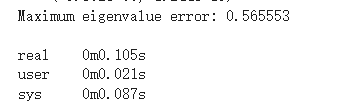
---
the implement on hermitian with multiple eigenvalues
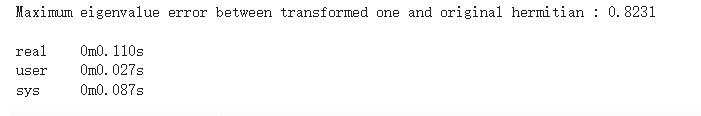